<a href="https://colab.research.google.com/github/vy-phung/Data-analysis/blob/main/No_Show_Medical_Appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Data analysis Medical Appointment <h1>**

**<h3>Author</h3>** 
<p>Vy K Phung</p>

**<h3>Date</h3>** 
<p>2021-Nov-5</p>


## **Introduction**
The purpose of this data analysis is to find if receiving SMS or not is associated with the customers showing up or not showing up in Medical appointment. I re-analyse the data source on Kaggle (you can go to the link below if you're also interested to analyse it) 

In addition, I wil analyse another factor which is scheduling in the same day or in advance the Medical appointment to know if it may effect the relationship between SMS_received and no-show appointment. 


**Data source:** https://www.kaggle.com/joniarroba/noshowappointments/home 

 (In this data source there is also the explanation for variable name. Moreover, this analysis for this data source refers to Simple Regression Analysis of Public Health on Coursera )

##**Summary:**
1. Data preprocessing
2. Exploratory data analysis
<ul>
<li>Feature engineering</li>
</ul>
3. Statistical analysis in R (using Logistic regression analysis)
<ul>
<li>Unadjusted data analysis</li>
<li>Adjusted data analysis</li>
<li>Stratified analysis</li>
</ul>
4. Basic predicting and classifying
<ul>
<li>Test-train split</li>
<li>Predicting using logistic regression and GridSearchCV</li>
</ul>


In [58]:
# Import packages 
# Package
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
# import the visualization package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## **Data preprocessing**

In [59]:
noshow = pd.read_csv('/content/KaggleV2-May-2016.csv')
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
noshow.shape

(110527, 14)

In [5]:
noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
print(noshow.dtypes)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [7]:
print(noshow.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


## **Exploratory data analysis**

In [60]:
no_show = []
for term in noshow['No-show']:
  if term == 'No':
    no_show.append('0')
  elif term == 'Yes':
    no_show.append('1')
df = pd.Series(no_show, name='noshow')
noshow = pd.concat([noshow, df], axis=1)
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


No     88208
Yes    22319
Name: No-show, dtype: int64


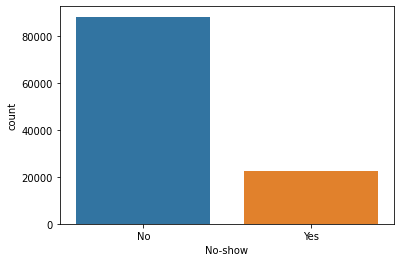

In [9]:
print(noshow['No-show'].value_counts())
sns.countplot(data=noshow,x = 'No-show')

0    75045
1    35482
Name: SMS_received, dtype: int64


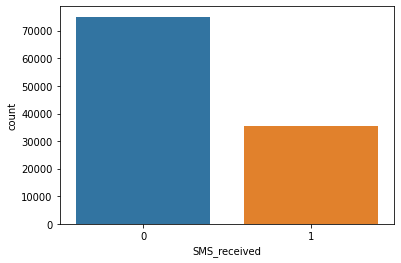

In [10]:
print(noshow['SMS_received'].value_counts())
sns.countplot(data=noshow,x = 'SMS_received')

Because I also want to analyse other factors especially the factor of scheduling in the same day or in advance the Medical appointment may effect the relationship between SMS_received and no-show appointment, I will do data wrangling and exploratory data analysis with Appointment day and Scheduled day columns

In [62]:
day = noshow[['AppointmentDay','ScheduledDay']]
day 

,AppointmentDay,ScheduledDay
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z
...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z


In [63]:
month = []
year = []
month1 = []
year1 = []
for s,a in zip(day['ScheduledDay'].values,day['AppointmentDay'].values):
  schedule = s.split('-')
  appoint = a.split('-')
  year.append(schedule[0]) 
  month.append(schedule[1]) 
  month1.append(appoint[1]) 
  year1.append(appoint[0]) 
Scheduled1 = pd.Series(month, name='Month_Sched')
Scheduled2 = pd.Series(year, name='Year_Sched')
Scheduled3 = pd.Series(month1, name='Month_App')
Scheduled4 = pd.Series(year1, name='Year_App')
day = pd.concat([day, Scheduled1, Scheduled2, Scheduled3, Scheduled4], axis=1)
day

,AppointmentDay,ScheduledDay,Month_Sched,Year_Sched,Month_App,Year_App
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z,04,2016,04,2016
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z,04,2016,04,2016
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z,04,2016,04,2016
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z,04,2016,04,2016
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z,04,2016,04,2016
...,...,...,...,...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z,05,2016,06,2016
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z,05,2016,06,2016
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z,04,2016,06,2016
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z,04,2016,06,2016


In [64]:
year = day['Year_Sched'].value_counts().reset_index()
year['Year_App'] = day['Year_App'].value_counts().reset_index()[['Year_App']]
year['Year_App'].replace(to_replace= np.nan, value=0, inplace=True)
year

,index,Year_Sched,Year_App
0,2016,110465,110527.0
1,2015,62,0.0


In [65]:
month = day['Month_Sched'].value_counts().reset_index()
month['Month_App'] = day['Month_App'].value_counts().reset_index()[['Month_App']]
month['Month_App'].replace(to_replace= np.nan, value=0, inplace=True)
month = month.set_index("index")
month.index.names = [None]
month

,Month_Sched,Month_App
05,67421,80841.0
04,25339,26451.0
06,13750,3235.0
03,3614,0.0
02,281,0.0
12,61,0.0
01,60,0.0
11,1,0.0


Text(0, 0.5, 'The number of appointment booked in each month')

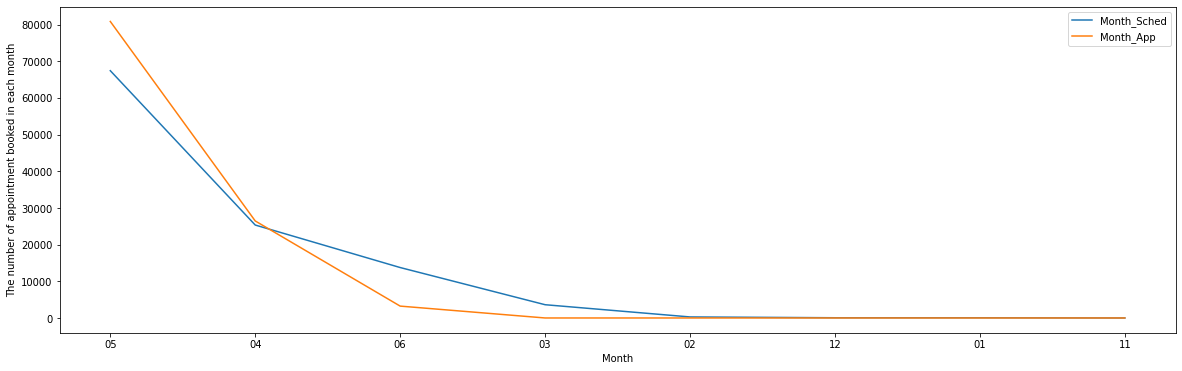

In [66]:
month.plot(kind='line', figsize = (20,6))
plt.xlabel('Month')
plt.ylabel('The number of appointment booked in each month')

We can see that mostly people booked their Medical appointment in summer (around April, May and June)

### **Feature engineering**

We will select the features that will be used in statistical analysis and prediction in the future module. <br>
Firstly, creating "in advance" column (people booking in advance the appointment day) and "same day" column (people booking in the same day with the appointment day)

In [67]:
booking = []
for i in range(0,len(day)):
  if day['Year_Sched'][i] < day['Year_App'][i]:
    booking.append('in advance')
  elif day['Year_Sched'][i] == day['Year_App'][i]:
    if day['Month_Sched'][i] == day['Month_App'][i]:
      booking.append('same day')
    elif day['Month_Sched'][i] < day['Month_App'][i]:
      booking.append('in advance')
Booking = pd.Series(booking, name='Reservation')
day = pd.concat([day, Booking], axis=1)   


In [68]:
In_adv = []
for i in day['Reservation']:
  if i == 'same day':
    In_adv.append('0')
  elif i == 'in advance':
    In_adv.append('1')
inadv = pd.Series(In_adv, name='In_advance')
day = pd.concat([day, inadv], axis=1)

We will do data transform for "In_advance" column so that in the next section we will easily see the frequency of no-show (Yes or No) in "In_advance" variable. 

In [70]:
in_adv_trans = preprocessing.StandardScaler().fit(day[['In_advance']].values).transform(day[['In_advance']].values)
day['transform'] = pd.DataFrame(in_adv_trans)[[0]]
day.head()

,AppointmentDay,ScheduledDay,Month_Sched,Year_Sched,Month_App,Year_App,Reservation,In_advance,transform
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z,04,2016,04,2016,same day,0,-0.715843
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z,04,2016,04,2016,same day,0,-0.715843
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z,04,2016,04,2016,same day,0,-0.715843
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z,04,2016,04,2016,same day,0,-0.715843
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z,04,2016,04,2016,same day,0,-0.715843


In [71]:
noshow = pd.concat([noshow, day[['Reservation']], day[['In_advance']],day[['transform']]], axis=1)
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,noshow,Reservation,In_advance,transform
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,same day,0,-0.715843
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,same day,0,-0.715843
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,same day,0,-0.715843
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,same day,0,-0.715843
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,same day,0,-0.715843


Text(0.5, 20.80000000000002, 'In_advance which near 0 is No and near 1 is Yes')

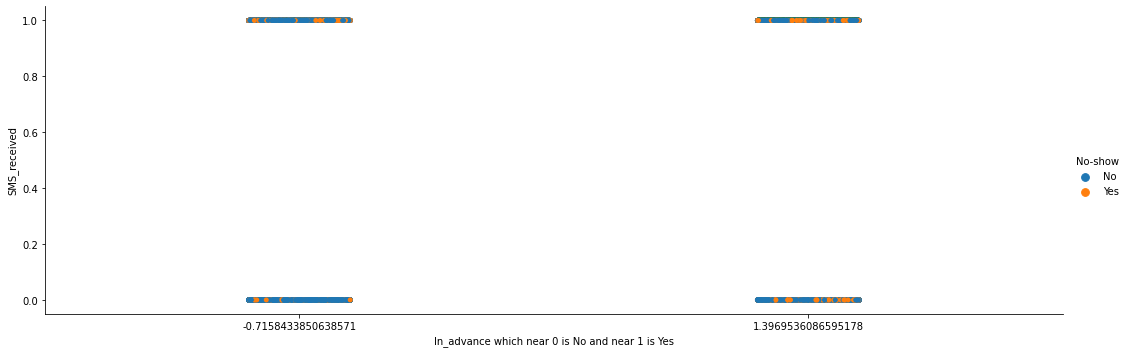

In [82]:
sns.catplot(data=noshow,x= 'transform',y='SMS_received' ,hue='No-show', aspect = 3)
plt.xlabel("In_advance which near 0 is No and near 1 is Yes")

We can see that for people booking not in advance (same day), they have the high frequency of showing up in appointment although they even didn't receive SMS. However, for people booking in advance, the frequency of not showing up in appointment is still high in both receiving and not receiving SMS.      

In [77]:
# save dataset
noshow.to_csv('noshow.csv')

## **Statistical analysis in R**

In [83]:
%load_ext rpy2.ipython

In [84]:
%%R
noshow <- read.csv("/content/noshow.csv")
head(noshow)

  X    PatientId AppointmentID Gender         ScheduledDay       AppointmentDay
1 0 2.987250e+13       5642903      F 2016-04-29T18:38:08Z 2016-04-29T00:00:00Z
2 1 5.589978e+14       5642503      M 2016-04-29T16:08:27Z 2016-04-29T00:00:00Z
3 2 4.262962e+12       5642549      F 2016-04-29T16:19:04Z 2016-04-29T00:00:00Z
4 3 8.679512e+11       5642828      F 2016-04-29T17:29:31Z 2016-04-29T00:00:00Z
5 4 8.841186e+12       5642494      F 2016-04-29T16:07:23Z 2016-04-29T00:00:00Z
6 5 9.598513e+13       5626772      F 2016-04-27T08:36:51Z 2016-04-29T00:00:00Z
  Age     Neighbourhood Scholarship Hipertension Diabetes Alcoholism Handcap
1  62   JARDIM DA PENHA           0            1        0          0       0
2  56   JARDIM DA PENHA           0            0        0          0       0
3  62     MATA DA PRAIA           0            0        0          0       0
4   8 PONTAL DE CAMBURI           0            0        0          0       0
5  56   JARDIM DA PENHA           0            1       

### **Unadjusted data**

In [85]:
%%R
result_un = glm(noshow$noshow ~ noshow$SMS_received, family = binomial)
summary(result_un)


Call:
glm(formula = noshow$noshow ~ noshow$SMS_received, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8033  -0.6046  -0.6046  -0.6046   1.8919  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.606802   0.009786 -164.19   <2e-16 ***
noshow$SMS_received  0.641137   0.015391   41.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111206  on 110526  degrees of freedom
Residual deviance: 109503  on 110525  degrees of freedom
AIC: 109507

Number of Fisher Scoring iterations: 4



In [86]:
%%R
coef <- c(coef(result_un)[1],coef(result_un)[2]) 
odd <- c(exp(coef(result_un)[1]), exp(coef(result_un)[2]))
prob <- c(odd[1]/(odd[1]+1), (odd[2] * odd[1])/((odd[2] * odd[1])+1))
table <- data.frame(coef, odd, prob)
table


                         coef       odd      prob
(Intercept)         -1.606802 0.2005279 0.1670331
noshow$SMS_received  0.641137 1.8986385 0.2757454


According to above summary, ln(odds of being a "no-show") = **-1.606802** + **0.641137**x where x = 1 if the patients received a SMS (a reference group), and 0 if the patient did not receive a SMS. The standard error of the slope estimate for x and intercept respectively is  0.015391, 0.009786


For patients not receiving SMS: ln(odd of being "no-show") = **-1.606802** (Intercept) <br>
Odd ratio of patients not receiving SMS and no show = **0.2** and the probability of them is **0.167** <br>
For the difference of ln(odd of being 'no-show') in patients receiving SMS to patients not receiving SMS = **0.641137** <br>
Unadjusted odds ratio (and 95% CI) of being "no-show" for those who received a SMS compared to those who did not: **1.899(1.841, 1.958)** <br>
Odd ratio of patients receiving SMS but no show = 0.2 * 1.899 = **0.3798** and the probability of them is 0.275


### **Adjusted data**

In [87]:
%%R
result_ad = glm(noshow$noshow ~ noshow$SMS_received + noshow$In_advance, family = binomial)
summary(result_ad)


Call:
glm(formula = noshow$noshow ~ noshow$SMS_received + noshow$In_advance, 
    family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8896  -0.6166  -0.5539  -0.5539   1.9751  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.79707    0.01094 -164.20   <2e-16 ***
noshow$SMS_received  0.23348    0.01773   13.17   <2e-16 ***
noshow$In_advance    0.84091    0.01743   48.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111206  on 110526  degrees of freedom
Residual deviance: 107188  on 110524  degrees of freedom
AIC: 107194

Number of Fisher Scoring iterations: 4



In [88]:
%%R
coef(result_ad)

        (Intercept) noshow$SMS_received   noshow$In_advance 
         -1.7970683           0.2334772           0.8409114 


In [89]:
%%R
SMS <- c(0,0,1,1)
Booking <- c(0,1,0,1)
ln_odds_of_noshow <- c(-1.7970683 + 0.2334772*SMS[1] + 0.8409114*Booking[1],
                        -1.7970683 + 0.2334772*SMS[2] + 0.8409114*Booking[2],
                        -1.7970683 + 0.2334772*SMS[3] + 0.8409114*Booking[3],
                        -1.7970683 + 0.2334772*SMS[4] + 0.8409114*Booking[4])
odd <- c(exp(ln_odds_of_noshow[1]),
         exp(ln_odds_of_noshow[2]),
         exp(ln_odds_of_noshow[3]),
         exp(ln_odds_of_noshow[4]))
prob <- c(odd[1]/(odd[1]+1),
          odd[2]/(odd[2]+1),
          odd[3]/(odd[3]+1),
          odd[4]/(odd[4]+1))
table <- data.frame(SMS, Booking, ln_odds_of_noshow, odd, prob)
table

  SMS Booking ln_odds_of_noshow       odd      prob
1   0       0        -1.7970683 0.1657842 0.1422083
2   0       1        -0.9561569 0.3843672 0.2776483
3   1       0        -1.5635911 0.2093828 0.1731320
4   1       1        -0.7226797 0.4854497 0.3268032


According to above summary having adjustment, ln(odds of being a "no-show") = **- 1.7970683** + **0.2334772**x1 + **0.8409114**x2 where: <br>
**x1(SMS)** = 1 if the patients received a SMS, and 0 if the patient did not receive a SMS. <br>
**x2(Booking)** = 1 if patients booking in advance, and 0 if patients booking same day to appointment. <br>
The standard errors of the intercept, slope estimate for x1, and slope estimate for x2 respectively are 0.01094, 0.01773, 0.01743.

### **Stratified analysis**
In this section, I will analyse separatedly 2 groups (same day or in advance) in order to see if the association between SMS_received with no showing up can be different between these 2 groups    

#### **In advance group** (people had scheduled the day before appointment day)

In [90]:
%%R
x_in = noshow[noshow$Reservation == 'in advance',]
head(x_in)

      X    PatientId AppointmentID Gender         ScheduledDay
50   49 9.223559e+13       5534656      F 2016-03-31T17:11:17Z
51   50 1.827172e+14       5534661      F 2016-03-31T17:12:45Z
52   51 4.694699e+13       5534635      F 2016-03-31T17:05:31Z
53   52 7.987570e+14       5534639      F 2016-03-31T17:06:17Z
178 177 7.271247e+12       5482953      M 2016-03-17T10:33:33Z
184 183 7.254972e+11       5524189      M 2016-03-30T07:32:47Z
          AppointmentDay Age  Neighbourhood Scholarship Hipertension Diabetes
50  2016-04-29T00:00:00Z  27 GRANDE VITÓRIA           0            0        0
51  2016-04-29T00:00:00Z  19 GRANDE VITÓRIA           0            0        0
52  2016-04-29T00:00:00Z  23 GRANDE VITÓRIA           1            0        0
53  2016-04-29T00:00:00Z  23 GRANDE VITÓRIA           1            0        0
178 2016-04-29T00:00:00Z  11 NOVA PALESTINA           0            0        0
184 2016-04-29T00:00:00Z  69      CONQUISTA           0            0        0
    Alcoholis

In [91]:
%%R
result_in = glm(x_in$noshow ~ x_in$SMS_received, family = binomial)
summary(result_in)


Call:
glm(formula = x_in$noshow ~ x_in$SMS_received, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9227  -0.8220  -0.8220   1.4555   1.5807  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.63353    0.01792  -35.36   <2e-16 ***
x_in$SMS_received -0.27789    0.02296  -12.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 46293  on 37447  degrees of freedom
Residual deviance: 46147  on 37446  degrees of freedom
AIC: 46151

Number of Fisher Scoring iterations: 4



In [92]:
%%R
coef <- c(coef(result_in)[1],coef(result_in)[2]) 
odd <- c(exp(coef(result_in)[1]), exp(coef(result_in)[2]))
prob <- c(odd[1]/(odd[1]+1), (odd[2] * odd[1])/((odd[2] * odd[1])+1))
table <- data.frame(coef, odd, prob)
table

                        coef       odd      prob
(Intercept)       -0.6335312 0.5307144 0.3467103
x_in$SMS_received -0.2778898 0.7573803 0.2867092


In [93]:
%%R 
dim(x_in)

[1] 37448    19


According to above summary of 37448 appointments booked in advance, this is the following logistic regression which show association between no-shows and SMS_received in this in advance group:

ln(odds of being a "no-show") = **- 0.6335312** + **- 0.2778898**x where x = 1 if the patients received a SMS, and 0 if the patient did not receive a SMS. 
The standard errors of the intercept and slope estimate for x respectively are 0.01792, 0.02296.

Odds ratio (and 95% CI) of being a "no-show" for those who booking in advance received a SMS compared to those who booking in advance but did not received: 
0.757 (0.723, 0.793) 

**p(SMS) = 0.287**; **p(noSMS) = 0.347** <br>
RD (Risk difference) = p(SMS) - p(noSMS) = 0.287 - 0.347 = **-0.06** <br>
**Conclusion:** For the patients **booking before appointment day**, there is **6% reduction of risk no showing up** in Medical appointment **if they received SMS** compared to those who didn't receive SMS 

#### **Same day group** (people had scheduled the same day to appointment day)

In [94]:
%%R
x_sam = noshow[noshow$Reservation == 'same day',]
head(x_sam)

  X    PatientId AppointmentID Gender         ScheduledDay       AppointmentDay
1 0 2.987250e+13       5642903      F 2016-04-29T18:38:08Z 2016-04-29T00:00:00Z
2 1 5.589978e+14       5642503      M 2016-04-29T16:08:27Z 2016-04-29T00:00:00Z
3 2 4.262962e+12       5642549      F 2016-04-29T16:19:04Z 2016-04-29T00:00:00Z
4 3 8.679512e+11       5642828      F 2016-04-29T17:29:31Z 2016-04-29T00:00:00Z
5 4 8.841186e+12       5642494      F 2016-04-29T16:07:23Z 2016-04-29T00:00:00Z
6 5 9.598513e+13       5626772      F 2016-04-27T08:36:51Z 2016-04-29T00:00:00Z
  Age     Neighbourhood Scholarship Hipertension Diabetes Alcoholism Handcap
1  62   JARDIM DA PENHA           0            1        0          0       0
2  56   JARDIM DA PENHA           0            0        0          0       0
3  62     MATA DA PRAIA           0            0        0          0       0
4   8 PONTAL DE CAMBURI           0            0        0          0       0
5  56   JARDIM DA PENHA           0            1       

In [95]:
%%R
result_sam = glm(x_sam$noshow ~ x_sam$SMS_received, family = binomial)
summary(result_sam)


Call:
glm(formula = x_sam$noshow ~ x_sam$SMS_received, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7650  -0.5205  -0.5205  -0.5205   2.0327  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.93037    0.01214 -158.97   <2e-16 ***
x_sam$SMS_received  0.85146    0.02440   34.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61067  on 73078  degrees of freedom
Residual deviance: 59945  on 73077  degrees of freedom
AIC: 59949

Number of Fisher Scoring iterations: 4



In [96]:
%%R
coef(result_sam)

       (Intercept) x_sam$SMS_received 
        -1.9303749          0.8514583 


In [97]:
%%R
coef <- c(coef(result_sam)[1],coef(result_sam)[2]) 
odd <- c(exp(coef(result_sam)[1]), exp(coef(result_sam)[2]))
prob <- c(odd[1]/(odd[1]+1), (odd[2] * odd[1])/((odd[2] * odd[1])+1))
table <- data.frame(coef, odd, prob)
table

                         coef       odd      prob
(Intercept)        -1.9303749 0.1450938 0.1267091
x_sam$SMS_received  0.8514583 2.3430612 0.2537111


In [98]:
%%R 
dim(x_sam)

[1] 73079    19


According to above summary of 73079 appointments booked in the same day, this is the following logistic regression which show association between no-shows and SMS_received in this same day group:

ln(odds of being a "no-show") = **-1.9303749** + **0.8514583**x where x = 1 if the patients received a SMS, and 0 if the patient did not receive a SMS. 
The standard errors of the intercept and slope estimate for x respectively are 0.01214, 0.02440.

Odds ratio (and 95% CI) of being no show for those who booking the same day received a SMS compared to those who booking the same day but did not received: 
2.343 (2.231, 2.46)

**p(SMS) = 0.254**; **p(noSMS) = 0.127** <br>
RD (Risk difference) = p(SMS) - p(noSMS) = 0.254 - 0.127 = 0.127 <br>
**Conclusion:** For the patients **booking in the same day** to appointment day, there is **12.7% greater of risk no showing up** in Medical appointment **even when they received SMS** compared to those who didn't receive SMS

## **Predicting and classifying**

#### **Test-train split**

In [104]:
x = noshow[['SMS_received','In_advance']].to_numpy()
y = noshow[['noshow']].to_numpy()

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)
print("x_train and x_test shape:", x_train.shape, x_test.shape)
print("y_train and y_test shape:", y_train.shape, y_test.shape)

x_train and x_test shape: (88421, 2) (22106, 2)
y_train and y_test shape: (88421, 1) (22106, 1)


In [106]:
print('x:',x[0:5])
print('y:',y[0:5])

x: [[0 '0']
 [0 '0']
 [0 '0']
 [0 '0']
 [0 '0']]
y: [['0']
 ['0']
 ['0']
 ['0']
 ['0']]


#### **Predicting noshow in appointment by using logistic regression and GridSearchCV for finding best parameters**

In [107]:
# parameters
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(x_train,y_train)

In [110]:
print("best parameters ",logreg_cv.best_params_)
print("first 5 predicted value:",logreg_cv.predict(x_test)[0:5])
print('first 5 actual value:',y_test[0:5])

best parameters  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
first 5 predicted value: ['0' '0' '0' '0' '0']
first 5 actual value: [['1']
 ['0']
 ['0']
 ['0']
 ['0']]


In [111]:
logreg_cv.score(x_test,y_test)

0.7968424862028408

In [114]:
print("confusion matrix:",metrics.confusion_matrix(y_test, logreg_cv.predict(x_test)))

confusion matrix: [[17615     0]
 [ 4491     0]]
